### Importing Libraries

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
# Importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Train and Validation Path

In [ ]:
train_path = '/content/drive/MyDrive/DataSet/Train'
valid_path = '/content/drive/MyDrive/DataSet/Validation'

### Model Formation

In [ ]:
# add preprocessing layer to the front of DenseNet
densenet = DenseNet169(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in densenet.layers:
    layer.trainable = False

In [ ]:
# Number of classes
folders = glob('/content/drive/MyDrive/DataSet/Train/*')

In [ ]:
# Our layers
x = Flatten()(densenet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Creating a Model object
model = Model(inputs=densenet.input, outputs=prediction)

In [ ]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
# Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DataSet/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1800 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DataSet/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 539 images belonging to 6 classes.


### Training the Model

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
57/57 [==============================] - 564s 9s/step - loss: 6.7378 - accuracy: 0.5381 - val_loss: 1.9974 - val_accuracy: 0.7922
Epoch 2/50
57/57 [==============================] - 35s 615ms/step - loss: 1.0278 - accuracy: 0.8688 - val_loss: 1.9392 - val_accuracy: 0.7495
Epoch 3/50
57/57 [==============================] - 34s 611ms/step - loss: 0.7752 - accuracy: 0.8801 - val_loss: 1.8597 - val_accuracy: 0.7792
Epoch 4/50
57/57 [==============================] - 35s 617ms/step - loss: 0.7120 - accuracy: 0.8956 - val_loss: 1.9747 - val_accuracy: 0.8126
Epoch 5/50
57/57 [==============================] - 35s 615ms/step - loss: 0.5247 - accuracy: 0.9137 - val_loss: 2.9366 - val_accuracy: 0.7551
Epoch 6/50
57/57 [==============================] - 35s 620ms/step - loss: 0.4826 - accuracy: 0.9188 - val_loss: 2.1691 - val_accuracy: 0.8015
Epoch 7/50
57/57 [==============================] - 35s 615ms/step - loss: 0.4664 - accuracy: 0.9249 - val_loss: 1.8780 - val_accuracy: 0.8145
E

### Evaluation

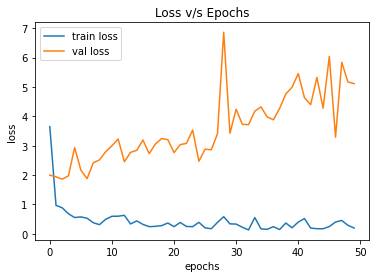

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Loss v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

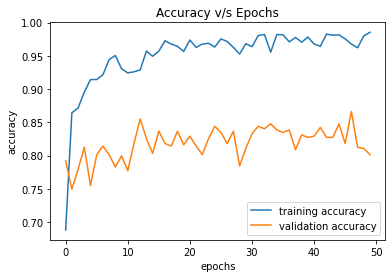

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.figure(0)
plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')